In [1]:
import pandas as pd
import numpy as np

## Exploratory Analysis

In [2]:
df = pd.read_csv('layoffs.csv')
df.head()

,company,location,industry,total_laid_off,percentage_laid_off,date,stage,country,funds_raised
0,BloomTech,SF Bay Area,Education,88.0,0.50,2022-12-01,Unknown,United States,NaN
1,Podium,Lehi,Support,NaN,0.12,2022-12-01,Series D,United States,419.0
2,DoorDash,SF Bay Area,Food,1250.0,0.06,2022-11-30,IPO,United States,2500.0
3,Kraken,SF Bay Area,Crypto,1100.0,0.30,2022-11-30,Unknown,United States,134.0
4,Happy Money,Los Angeles,Finance,158.0,0.34,2022-11-30,Series D,United States,191.0


In [3]:
df.shape

(1714, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1714 entries, 0 to 1713
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   company              1714 non-null   object 
 1   location             1714 non-null   object 
 2   industry             1711 non-null   object 
 3   total_laid_off       1209 non-null   float64
 4   percentage_laid_off  1152 non-null   float64
 5   date                 1714 non-null   object 
 6   stage                1710 non-null   object 
 7   country              1714 non-null   object 
 8   funds_raised         1591 non-null   float64
dtypes: float64(3), object(6)
memory usage: 120.6+ KB


In [5]:
df.nunique()

company                1437
location                161
industry                 27
total_laid_off          231
percentage_laid_off      69
date                    402
stage                    15
country                  55
funds_raised            553
dtype: int64

In [6]:
df.isna().sum()

company                  0
location                 0
industry                 3
total_laid_off         505
percentage_laid_off    562
date                     0
stage                    4
country                  0
funds_raised           123
dtype: int64

## Total Count

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style = "darkgrid")

params = {
    'figure.figsize': (8,5),
    'axes.titlesize': 20,
    'axes.labelsize': 16,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
}
plt.rcParams.update(params)

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


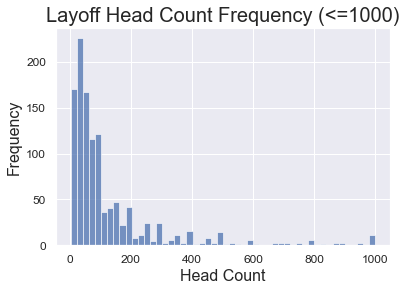

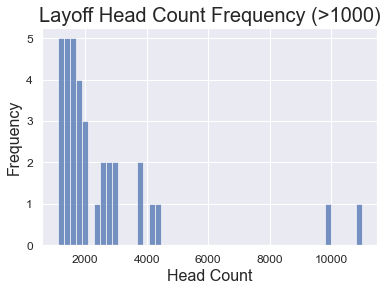

In [8]:
ct1 = df[df.total_laid_off <= 1000]['total_laid_off']
ct2 = df[df.total_laid_off > 1000]['total_laid_off']

sns.histplot(ct1, bins=50)
plt.title('Layoff Head Count Frequency (<=1000)')
plt.xlabel('Head Count')
plt.ylabel('Frequency')
plt.show()

sns.histplot(ct2, bins=50)
plt.title('Layoff Head Count Frequency (>1000)')
plt.xlabel('Head Count')
plt.ylabel('Frequency')
plt.show()

## Company

In [9]:
def cum_perc(arr_perc):
    r = 0
    for p in arr_perc[:]:
        r = r + (1 - r) * p
    return r

cum_perc([0.9, 0.8])
# expecting 0.9 + 0.1 * 0.8 = 0.98

0.98

In [10]:
df_com = df.fillna(0).groupby(['company', 'industry']).agg({'total_laid_off': 'sum', 'percentage_laid_off': cum_perc})
df_com = df_com.sort_values(by='total_laid_off', ascending=False).reset_index(drop=False)
df_com.head(10)

,company,industry,total_laid_off,percentage_laid_off
0,Meta,Consumer,11000.0,0.130000
1,Amazon,Retail,10000.0,0.030000
2,Uber,Transportation,7585.0,0.567914
3,Booking.com,Travel,4601.0,0.250000
4,Cisco,Infrastructure,4100.0,0.050000
5,Peloton,Fitness,4084.0,0.387520
6,Carvana,Transportation,4000.0,0.190400
7,Better.com,Real Estate,3900.0,0.390300
8,Bytedance,Consumer,3750.0,0.000000
9,Twitter,Consumer,3700.0,0.500000


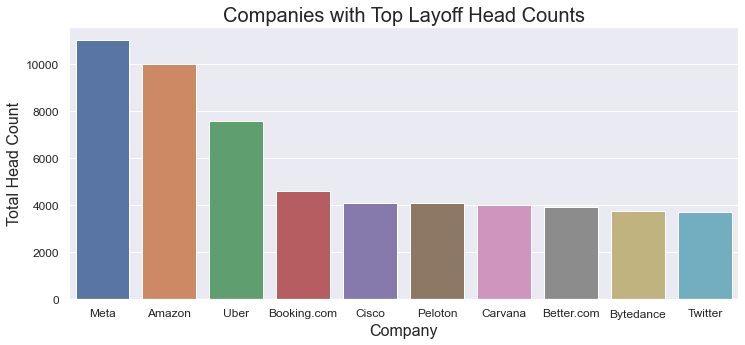

In [11]:
plt.figure(figsize=(12, 5))
sns.barplot(df_com.head(10), x='company', y='total_laid_off')
plt.title('Companies with Top Layoff Head Counts')
plt.xlabel('Company')
plt.ylabel('Total Head Count')
plt.show()

#### Total vs. Percentage

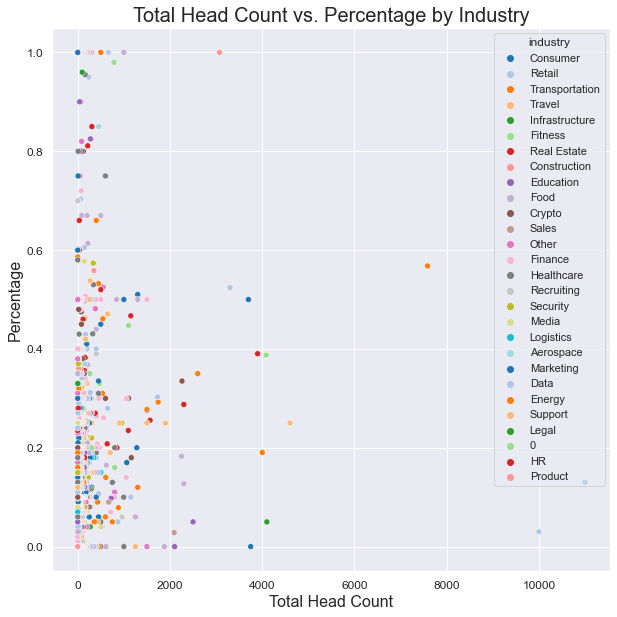

In [12]:
plt.figure(figsize=(10, 10))
sns.scatterplot(data=df_com, x='total_laid_off', y='percentage_laid_off', hue='industry',  palette='tab20') 
plt.title('Total Head Count vs. Percentage by Industry')
plt.xlabel('Total Head Count')
plt.ylabel('Percentage')
plt.show()

## Industry

In [13]:
df_ind = df.fillna(0).groupby(['industry']).agg({'total_laid_off': 'sum'})
df_ind = df_ind.sort_values(by='total_laid_off', ascending=False).reset_index()
df_ind.head(10)

,industry,total_laid_off
0,Transportation,28645.0
1,Consumer,28494.0
2,Retail,27421.0
3,Finance,19811.0
4,Food,19406.0
5,Real Estate,16022.0
6,Travel,14876.0
7,Healthcare,11900.0
8,Education,10358.0
9,Fitness,8538.0


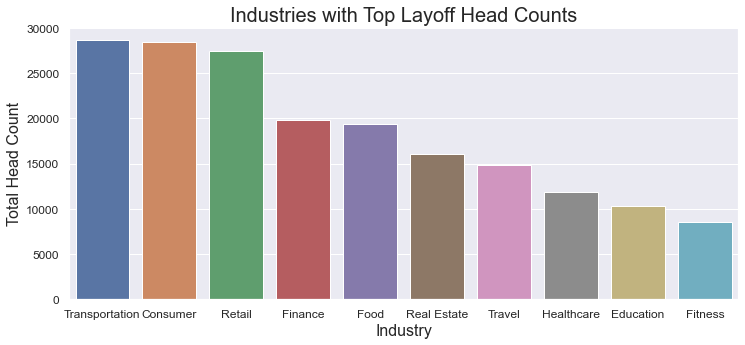

In [14]:
plt.figure(figsize=(12, 5))
sns.barplot(df_ind.head(10), x='industry', y='total_laid_off')
plt.title('Industries with Top Layoff Head Counts')
plt.xlabel('Industry')
plt.ylabel('Total Head Count')
plt.show()

In [15]:
df[df.industry == 'Transportation'].company.unique()

array(['Carwow', 'SWVL', 'Carvana', 'Nuro', 'Kavak', 'Dance',
       'GoTo Group', 'Beat', 'Lyft', 'Argo AI', 'Volta', 'Arrival',
       'Zoomo', 'Spin', 'Carsome', '99', 'Ouster', 'Ola', 'Quicko',
       'Uber', 'Otonomo', 'Tier Mobility', 'Shift', 'Vroom', 'CarDekho',
       'Perceptive Automata', 'Rivian', 'Rad Power Bikes', 'Canoo',
       'Clutch', 'Oye Rickshaw', 'Baton', 'Superpedestrian', 'Voi',
       'Starship', 'Cazoo', 'Bird', 'Tesla', 'Getta', 'Cars24', 'Reef',
       'Virgin Hyperloop', 'Bounce', 'Scoop', 'HumanForest', 'Waze',
       'HopSkipDrive', 'The Appraisal Lane', 'Byton', 'Gojek', 'Grab',
       'Outdoorsy', 'SpotHero', 'Circ', 'TrueCar', 'Kapten / Free Now',
       'Cruise', 'Ridecell', 'Jump', 'Careem', 'Automatic', 'Lime',
       'Divergent 3D', 'Ike', 'Zum', 'CarGurus', 'Kodiak Robotics',
       'Zoox', 'BusBud', 'Velodyne Lidar', 'Shuttl', 'Moovel', 'Turo',
       'Starship Technologies', 'Getaround', 'Zipcar', 'Passport'],
      dtype=object)

In [16]:
df[df.industry == 'Consumer'].company.unique()

array(['Pinterest', 'Wildlife Studios', 'Viber', 'Tencent', 'Juul',
       'Meta', 'Cameo', 'Kabam', 'Twitter', 'Playdots', 'Sea', 'Snap',
       'Koo', 'Skillz', 'Linktree', 'Warby Parker', 'iRobot', 'Jam City',
       'StubHub', 'SoundCloud', 'TextNow', 'TikTok', 'Vimeo', 'StyleSeat',
       '100 Thieves', 'Lightricks', 'Chessable', 'Airtasker', 'Niantic',
       'Bytedance', 'Airtame', 'Memmo', 'Superhuman', 'Clubhouse',
       'Gather', 'IRL', 'Kaodim', 'Eaze', 'Playtika',
       'Mobile Premier League', 'Dazn', 'Airtime', 'Picsart',
       'Xiaohongshu', 'Glossier', 'Genius', 'DJI', 'Mozilla', 'Yelp',
       'Havenly', 'Sonos', 'MakerBot', 'BookMyShow', 'Sandbox VR',
       'Care.com', 'Jiobit', 'Magic Leap', 'Houzz', 'GoPro',
       'SweetEscape', 'VSCO', 'Eventbrite', 'GetNinjas', 'Iflix',
       'Booksy', 'Rover', 'Thumbtack', 'Polarr', 'HOOQ', 'Clutter',
       'Takl', 'Panda Squad'], dtype=object)

## Countries

In [17]:
df_ctr = df.fillna(0).groupby(['country']).agg({'total_laid_off': 'sum'})
df_ctr = df_ctr.sort_values(by='total_laid_off', ascending=False).reset_index()
df_ctr.head(10)

,country,total_laid_off
0,United States,158128.0
1,India,29726.0
2,Brazil,7525.0
3,Singapore,5493.0
4,Canada,5199.0
5,Netherlands,5070.0
6,United Kingdom,4739.0
7,China,4430.0
8,Germany,4113.0
9,Indonesia,2961.0


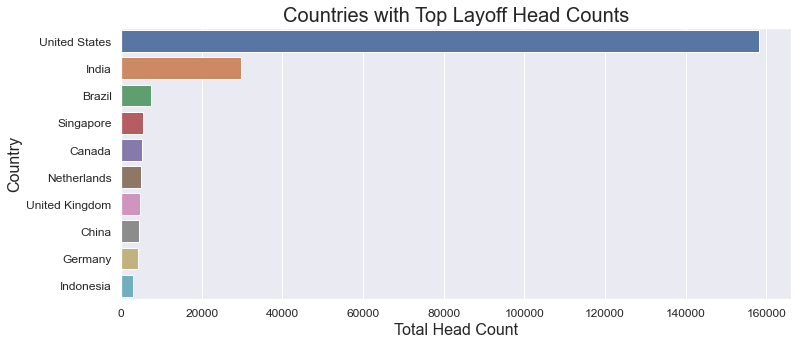

In [18]:
plt.figure(figsize=(12, 5))
sns.barplot(df_ctr.head(10), y='country', x='total_laid_off')
plt.title('Countries with Top Layoff Head Counts')
plt.xlabel('Total Head Count')
plt.ylabel('Country')
plt.show()

#### Country + Location

In [19]:
df_ctr2 = df.fillna(0).groupby(['country', 'location']).agg({'total_laid_off': 'sum'})
df_ctr2 = df_ctr2.reset_index()
df_ctr2 = df_ctr2.pivot(index='country', columns='location', values='total_laid_off')
df_ctr2 = df_ctr2.reindex(index = df_ctr.country).reset_index()
df_ctr2.head()

location,country,Ahmedabad,Amsterdam,Ann Arbor,Athens,Atlanta,Auckland,Austin,Baltimore,Bangkok,...,Vancouver,Victoria,Vienna,Vilnius,Washington D.C.,Waterloo,Winnipeg,Yangon,Zug,Zurich
0,United States,NaN,NaN,40.0,NaN,1461.0,NaN,1892.0,20.0,NaN,...,174.0,NaN,NaN,NaN,867.0,NaN,NaN,NaN,NaN,NaN
1,India,500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Brazil,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Singapore,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Canada,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1027.0,NaN,NaN,NaN,NaN,112.0,350.0,NaN,NaN,NaN


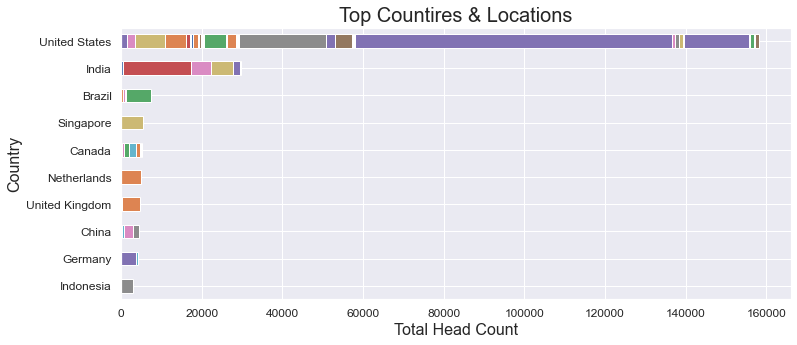

In [20]:
df_ctr2.head(10).plot.barh(stacked=True, figsize=(12, 5))
plt.gca().invert_yaxis()
plt.title('Top Countires & Locations')
plt.xlabel('Total Head Count')
plt.ylabel('Country')
plt.yticks(plt.gca().get_yticks(), labels=df_ctr2.head(10).country)
plt.legend('', frameon=False)
plt.show()

#### Country + Industry

In [21]:
df_ctr3 = df.fillna(0).groupby(['country', 'industry']).agg({'total_laid_off': 'sum'})
df_ctr3 = df_ctr3.reset_index()
df_ctr3 = df_ctr3.pivot(index='country', columns='industry', values='total_laid_off')
df_ctr3 = df_ctr3.reindex(index = df_ctr.country).reset_index()
df_ctr3.head()

industry,country,0,Aerospace,Construction,Consumer,Crypto,Data,Education,Energy,Finance,...,Other,Product,Real Estate,Recruiting,Retail,Sales,Security,Support,Transportation,Travel
0,United States,268.0,210.0,3330.0,23002.0,3356.0,2357.0,1448.0,667.0,9736.0,...,3169.0,536.0,14195.0,2550.0,20203.0,3513.0,3384.0,1067.0,18310.0,4958.0
1,India,NaN,NaN,140.0,2210.0,60.0,40.0,8034.0,NaN,3181.0,...,NaN,NaN,350.0,200.0,2874.0,NaN,NaN,NaN,4530.0,1900.0
2,Brazil,NaN,NaN,NaN,311.0,190.0,NaN,191.0,NaN,2424.0,...,83.0,NaN,885.0,18.0,615.0,51.0,NaN,33.0,285.0,667.0
3,Singapore,NaN,NaN,NaN,250.0,2900.0,NaN,NaN,NaN,118.0,...,NaN,NaN,NaN,NaN,324.0,NaN,NaN,NaN,360.0,1500.0
4,Canada,NaN,NaN,350.0,22.0,30.0,NaN,220.0,47.0,571.0,...,146.0,114.0,191.0,NaN,1570.0,95.0,24.0,140.0,99.0,22.0


In [22]:
use_colors = [
    '#FFA07A', '#F08080', '#FF0000', '#B22222',  # reds
    '#FFC0CB', '#FF69B4', '#FF1493', '#C71585',  # pinks
    '#FFA500', '#FF8C00', '#FFA07A', '#FF6347',  # oranges
    '#FFFFE0', '#EEE8AA', '#FFD700', '#FFFF00',  # yellows
    '#E6E6FA', '#D8BFD8', '#EE82EE', '#9370DB',  # purples
    '#ADFF2F', '#32CD32', '#66CDAA', '#2E8B57',  # greens
    '#00FFFF', '#4682B4', '#00BFFF', '#0000FF',  # blues
]

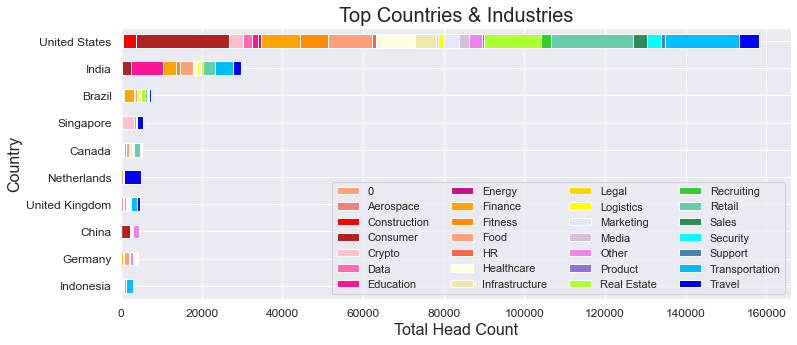

In [23]:
fig, ax = plt.subplots(1)
df_ctr3.head(10).plot.barh(ax=ax, stacked=True, figsize=(12, 5), color=use_colors)
plt.gca().invert_yaxis()
plt.title('Top Countries & Industries')
plt.xlabel('Total Head Count')
plt.ylabel('Country')
plt.yticks(plt.gca().get_yticks(), labels=df_ctr3.head(10).country)
plt.legend(loc='lower right', ncol=4)
plt.show()

In [24]:
print(plt.rcParams['axes.prop_cycle'].by_key()['color'])

[(0.2980392156862745, 0.4470588235294118, 0.6901960784313725), (0.8666666666666667, 0.5176470588235295, 0.3215686274509804), (0.3333333333333333, 0.6588235294117647, 0.40784313725490196), (0.7686274509803922, 0.3058823529411765, 0.3215686274509804), (0.5058823529411764, 0.4470588235294118, 0.7019607843137254), (0.5764705882352941, 0.47058823529411764, 0.3764705882352941), (0.8549019607843137, 0.5450980392156862, 0.7647058823529411), (0.5490196078431373, 0.5490196078431373, 0.5490196078431373), (0.8, 0.7254901960784313, 0.4549019607843137), (0.39215686274509803, 0.7098039215686275, 0.803921568627451)]


#### Mapping

In [25]:
df_loc = df.fillna(0).groupby(['location']).agg({'total_laid_off': 'sum'})
df_loc = df_loc.sort_values(by='total_laid_off', ascending=False).reset_index()
df_loc = df_loc[df_loc.total_laid_off != 0]
df_loc.head()

,location,total_laid_off
0,SF Bay Area,78678.0
1,New York City,21554.0
2,Bengaluru,16790.0
3,Seattle,16051.0
4,Boston,7246.0


In [26]:
import geopandas as gpd
cities = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))
cities.head()

,name,geometry
0,Vatican City,POINT (12.45339 41.90328)
1,San Marino,POINT (12.44177 43.93610)
2,Vaduz,POINT (9.51667 47.13372)
3,Lobamba,POINT (31.20000 -26.46667)
4,Luxembourg,POINT (6.13000 49.61166)


In [27]:
df_map = gpd.GeoDataFrame(df_loc.merge(cities, left_on='location', right_on='name', how='outer'))
df_map[df_map.geometry.isna()].head(20)

,location,total_laid_off,name,geometry
0,SF Bay Area,78678.0,NaN,None
1,New York City,21554.0,NaN,None
3,Seattle,16051.0,NaN,None
4,Boston,7246.0,NaN,None
5,Sao Paulo,6325.0,NaN,None
11,Gurugram,4751.0,NaN,None
13,Phoenix,4113.0,NaN,None
16,Philadelphia,2340.0,NaN,None
20,Austin,1892.0,NaN,None
24,Shenzen,1500.0,NaN,None


In [28]:
df_map.loc[df_map.location == 'SF Bay Area', 'geometry'] = gpd.points_from_xy([-122.39960], [37.78426])
df_map.loc[df_map.location == 'New York City', 'geometry'] = gpd.points_from_xy([-73.99572], [40.72156])
df_map.loc[df_map.location == 'Seattle', 'geometry'] = gpd.points_from_xy([-122.3321], [47.6062])
df_map.loc[df_map.location == 'Boston', 'geometry'] = gpd.points_from_xy([-71.0589], [42.3601])
df_map.loc[df_map.location == 'Sao Paulo', 'geometry'] = gpd.points_from_xy([-46.6396], [-23.5558])
df_map.loc[df_map.location == 'Gurugram', 'geometry'] = gpd.points_from_xy([77.0266], [28.4595])
df_map.loc[df_map.location == 'Phoenix', 'geometry'] = gpd.points_from_xy([-112.0740], [33.4484])
df_map.loc[df_map.location == 'Philadelphia', 'geometry'] = gpd.points_from_xy([-75.1652], [39.9526])
df_map.loc[df_map.location == 'Austin', 'geometry'] = gpd.points_from_xy([-97.7431], [30.2672])
df_map.loc[df_map.location == 'Shenzen', 'geometry'] = gpd.points_from_xy([114.0596], [22.5429])
df_map.loc[df_map.location == 'Detroit', 'geometry'] = gpd.points_from_xy([-83.0458], [42.3314])
df_map.loc[df_map.location == 'San Luis Obispo', 'geometry'] = gpd.points_from_xy([-120.6596], [35.2828])
df_map.loc[df_map.location == 'Stamford', 'geometry'] = gpd.points_from_xy([-73.5387], [41.0534])
df_map.loc[df_map.location == 'Columbus', 'geometry'] = gpd.points_from_xy([-82.9988], [39.9612])
df_map.loc[df_map.location == 'Washington D.C.', 'geometry'] = gpd.points_from_xy([-77.0369], [38.9072])
df_map.loc[df_map.location == 'San Diego', 'geometry'] = gpd.points_from_xy([-117.1611], [32.7157])
df_map.loc[df_map.location == 'Salt Lake City', 'geometry'] = gpd.points_from_xy([-111.8910], [40.7608])
df_map.loc[df_map.location == 'Montreal', 'geometry'] = gpd.points_from_xy([-73.5674], [45.5019])

df_map[df_map.geometry.isna()].head()

,location,total_laid_off,name,geometry
39,Non-U.S.,575.0,NaN,None
40,Ahmedabad,500.0,NaN,None
41,Belo Horizonte,494.0,NaN,None
44,Curitiba,462.0,NaN,None
45,Las Vegas,405.0,NaN,None


In [29]:
df_map['latitude'] = df_map.geometry.apply(lambda x: x.y if x else None)
df_map['longitude'] = df_map.geometry.apply(lambda x: x.x if x else None)
df_map.head()

,location,total_laid_off,name,geometry,latitude,longitude
0,SF Bay Area,78678.0,NaN,POINT (-122.39960 37.78426),37.784260,-122.399600
1,New York City,21554.0,NaN,POINT (-73.99572 40.72156),40.721560,-73.995720
2,Bengaluru,16790.0,Bengaluru,POINT (77.55806 12.97194),12.971941,77.558064
3,Seattle,16051.0,NaN,POINT (-122.33210 47.60620),47.606200,-122.332100
4,Boston,7246.0,NaN,POINT (-71.05890 42.36010),42.360100,-71.058900


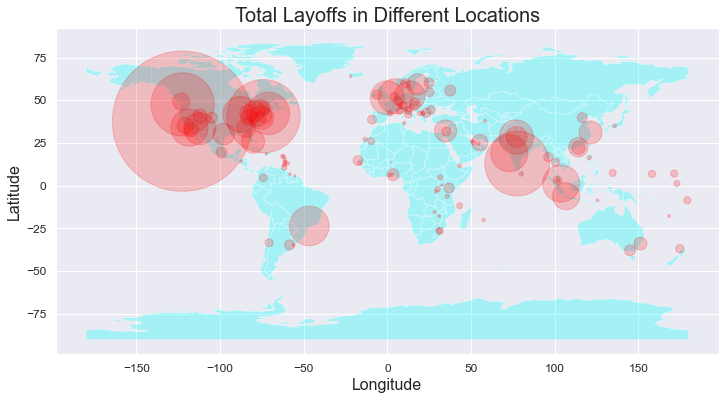

In [30]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

fig, ax = plt.subplots(figsize=(12, 6))
world.plot(ax=ax, color='cyan', alpha=0.3)
df_map.plot(ax=ax, marker='.', color='red', markersize='total_laid_off', alpha=0.2)
plt.title('Total Layoffs in Different Locations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

## Timeline

In [31]:
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].apply(lambda x: x.year)
df['month'] = df['date'].apply(lambda x: x.month)
df['quarter'] = df['month'].apply(lambda x: int(np.ceil(x / 3)))
df.head()

,company,location,industry,total_laid_off,percentage_laid_off,date,stage,country,funds_raised,year,month,quarter
0,BloomTech,SF Bay Area,Education,88.0,0.50,2022-12-01,Unknown,United States,NaN,2022,12,4
1,Podium,Lehi,Support,NaN,0.12,2022-12-01,Series D,United States,419.0,2022,12,4
2,DoorDash,SF Bay Area,Food,1250.0,0.06,2022-11-30,IPO,United States,2500.0,2022,11,4
3,Kraken,SF Bay Area,Crypto,1100.0,0.30,2022-11-30,Unknown,United States,134.0,2022,11,4
4,Happy Money,Los Angeles,Finance,158.0,0.34,2022-11-30,Series D,United States,191.0,2022,11,4


#### By Date

In [32]:
df_day = df.fillna(0).groupby(['date']).agg({'total_laid_off': 'sum'})
df_day = df_day.sort_values(by='date', ascending=True).reset_index()
df_day.head()

,date,total_laid_off
0,2020-03-11,75.0
1,2020-03-12,20.0
2,2020-03-13,14.0
3,2020-03-16,146.0
4,2020-03-18,4.0


In [33]:
def smooth(y, n_pts):
    kernel = np.ones(n_pts) / n_pts
    return np.convolve(y, kernel, mode='same').round()

df_day['smoothed'] = smooth(df_day.total_laid_off, 10)
df_day.head()

,date,total_laid_off,smoothed
0,2020-03-11,75.0,26.0
1,2020-03-12,20.0,55.0
2,2020-03-13,14.0,142.0
3,2020-03-16,146.0,215.0
4,2020-03-18,4.0,286.0


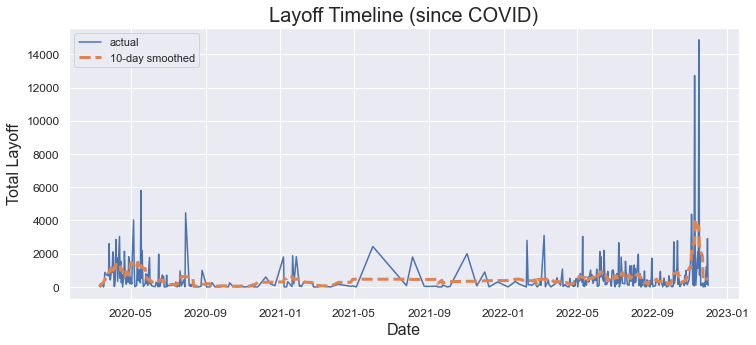

In [34]:
plt.figure(figsize=(12, 5))
sns.lineplot(df_day, x='date', y='total_laid_off', label='actual')
sns.lineplot(df_day, x='date', y='smoothed', label='10-day smoothed', linewidth=3, linestyle='dashed')
plt.title('Layoff Timeline (since COVID)')
plt.xlabel('Date')
plt.ylabel('Total Layoff')
plt.legend()
plt.show()

#### Frequency

In [35]:
dates = df['date'].drop_duplicates().sort_values().reset_index(drop=True)
diffs = dates.diff().apply(lambda x: x.days)
diffs.mean().round(1)

2.5

In [36]:
diffs.max()

55.0

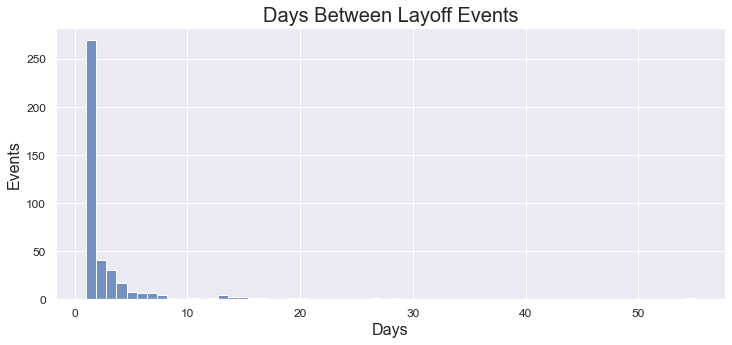

In [37]:
plt.figure(figsize=(12, 5))
sns.histplot(diffs, bins=60)
plt.title('Days Between Layoff Events')
plt.xlabel('Days')
plt.ylabel('Events')
plt.show()

#### Company Frequency

In [38]:
df.groupby('company')['total_laid_off'].count().nlargest(10)

company
Uber         5
Gopuff       4
Latch        4
Loft         4
Netflix      4
Patreon      4
Shopify      4
WeWork       4
Bounce       3
Bytedance    3
Name: total_laid_off, dtype: int64

In [39]:
df[df.company == 'Uber']

,company,location,industry,total_laid_off,percentage_laid_off,date,stage,country,funds_raised,year,month,quarter
373,Uber,Vilnius,Transportation,60.0,NaN,2022-09-07,IPO,Lithuania,24700.0,2022,9,3
1191,Uber,Amsterdam,Transportation,225.0,0.25,2020-06-12,IPO,Netherlands,24700.0,2020,6,2
1223,Uber,Bengaluru,Transportation,600.0,0.23,2020-05-26,IPO,India,24700.0,2020,5,2
1242,Uber,SF Bay Area,Transportation,3000.0,0.13,2020-05-18,IPO,United States,24700.0,2020,5,2
1287,Uber,SF Bay Area,Transportation,3700.0,0.14,2020-05-06,IPO,United States,24700.0,2020,5,2


#### By Month

In [40]:
df_mon = df.fillna(0).groupby(['month']).agg({'total_laid_off': ['sum', 'count']})
df_mon = df_mon.sort_values(by='month', ascending=True).reset_index()
df_mon.columns = ['_'.join(col).strip() for col in df_mon.columns.values]
df_mon

,month_,total_laid_off_sum,total_laid_off_count
0,1,6523.0,13
1,2,4493.0,19
2,3,15369.0,142
3,4,31035.0,302
4,5,38339.0,186
5,6,27645.0,243
6,7,23415.0,188
7,8,16931.0,179
8,9,6651.0,113
9,10,13155.0,109


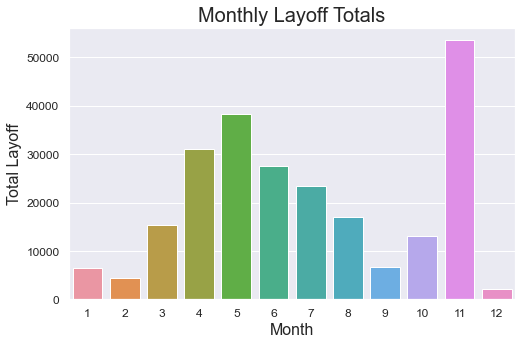

In [41]:
plt.figure(figsize=(8, 5))
sns.barplot(df_mon, x='month_', y='total_laid_off_sum')
plt.title('Monthly Layoff Totals')
plt.xlabel('Month')
plt.ylabel('Total Layoff')
plt.show()

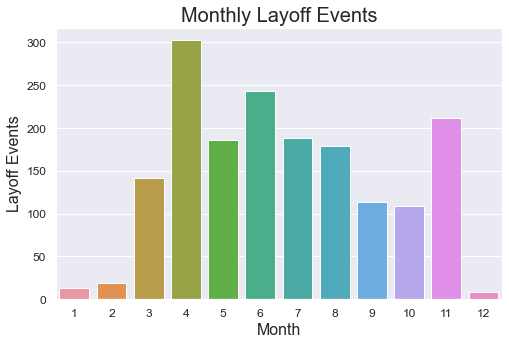

In [42]:
plt.figure(figsize=(8, 5))
sns.barplot(df_mon, x='month_', y='total_laid_off_count')
plt.title('Monthly Layoff Events')
plt.xlabel('Month')
plt.ylabel('Layoff Events')
plt.show()

#### By Quarter

In [43]:
df_qtr = df.fillna(0).groupby(['quarter']).agg({'total_laid_off': ['sum', 'count']})
df_qtr = df_qtr.sort_values(by='quarter', ascending=True).reset_index()
df_qtr.columns = ['_'.join(col).strip() for col in df_qtr.columns.values]
df_qtr

,quarter_,total_laid_off_sum,total_laid_off_count
0,1,26385.0,174
1,2,97019.0,731
2,3,46997.0,480
3,4,68787.0,329


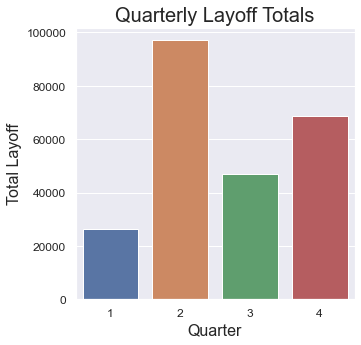

In [44]:
plt.figure(figsize=(5, 5))
sns.barplot(df_qtr, x='quarter_', y='total_laid_off_sum')
plt.title('Quarterly Layoff Totals')
plt.xlabel('Quarter')
plt.ylabel('Total Layoff')
plt.show()

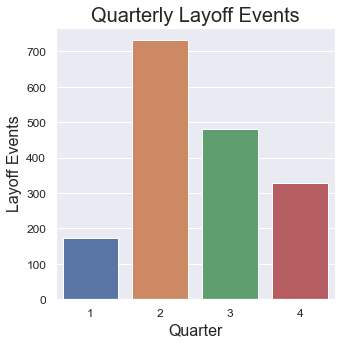

In [45]:
plt.figure(figsize=(5, 5))
sns.barplot(df_qtr, x='quarter_', y='total_laid_off_count')
plt.title('Quarterly Layoff Events')
plt.xlabel('Quarter')
plt.ylabel('Layoff Events')
plt.show()

#### By Industry and Year

In [46]:
df_ind2 = df.fillna(0).groupby(['industry', 'year']).agg({'total_laid_off': 'sum'})
df_ind2 = df_ind2.reset_index()
df_ind2 = df_ind2.pivot(index='industry', columns='year', values='total_laid_off')
df_ind2 = df_ind2.reindex(index = df_ind.industry).reset_index()
df_ind2.head()

year,industry,2020,2021,2022
0,Transportation,14656.0,200.0,13789.0
1,Consumer,6063.0,3600.0,18831.0
2,Retail,8002.0,288.0,19131.0
3,Finance,8624.0,0.0,11187.0
4,Food,6218.0,2644.0,10544.0


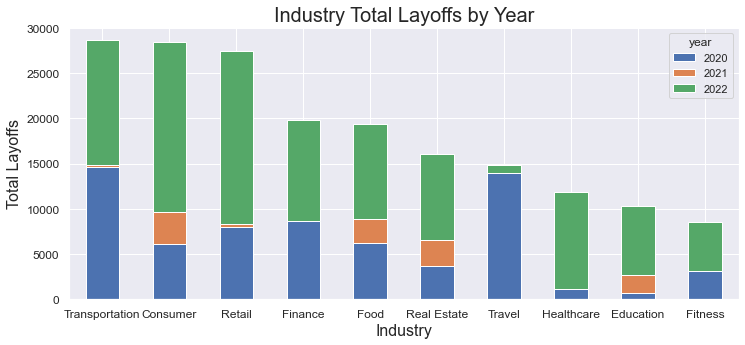

In [47]:
df_ind2.head(10).plot.bar(stacked=True, figsize=(12, 5))
plt.title('Industry Total Layoffs by Year')
plt.xlabel('Industry')
plt.ylabel('Total Layoffs')
plt.xticks(plt.gca().get_xticks(), labels=df_ind2.head(10).industry, rotation=0)
plt.show()

#### By Company and Year

In [48]:
df_com2 = df.fillna(0).groupby(['company', 'year']).agg({'total_laid_off': 'sum'})
df_com2 = df_com2.reset_index()
df_com2 = df_com2.pivot(index='company', columns='year', values='total_laid_off')
df_com2 = df_com2.reindex(index = df_com.company).reset_index()
df_com2.head()

year,company,2020,2021,2022
0,Meta,NaN,NaN,11000.0
1,Amazon,NaN,NaN,10000.0
2,Uber,7525.0,NaN,60.0
3,Booking.com,4375.0,NaN,226.0
4,Cisco,NaN,NaN,4100.0


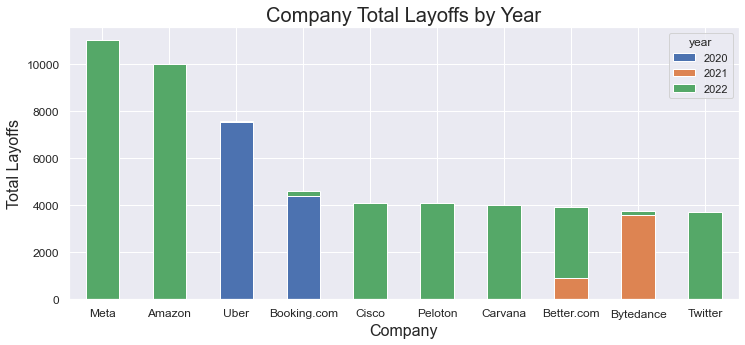

In [49]:
df_com2.head(10).plot.bar(stacked=True, figsize=(12, 5))
plt.title('Company Total Layoffs by Year')
plt.xlabel('Company')
plt.ylabel('Total Layoffs')
plt.xticks(plt.gca().get_xticks(), labels=df_com2.head(10).company, rotation=0)
plt.show()